In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import reuters

In [4]:
from tensorflow.keras import models,layers,optimizers,utils

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=1000)

2113536/2110848 [==============================] - 4s 2us/step


In [9]:
print(len(test_data))
print(len(train_data))

2246
8982


In [10]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 2,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 2,
 2,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 2,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [11]:
def vectorize_sequences(sequences,dimension=1000):
    results=np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence]=1
    return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)


In [15]:
def to_one_hot(labels,dimension=46):
    results=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label]=1
    return results

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)

In [16]:
#or hot encode with library
one_hot_train_labels=utils.to_categorical(train_labels)
one_hot_test_labels=utils.to_categorical(test_labels)

In [18]:
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]

# Building Network

In [27]:
model=models.Sequential()
model.add(layers.Dense(64,activation="relu" ,input_shape=(1000,)))
model.add(layers.Dense(64,activation="relu"))
model.add(layers.Dense(46,activation="softmax"))

In [28]:
model.compile(optimizer="rmsprop",loss='categorical_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 296us/sample - loss: 2.8739 - acc: 0.4539 - val_loss: 2.0027 - val_acc: 0.5810
Epoch 2/20
7982/7982 [==============================] - 0s 19us/sample - loss: 1.7230 - acc: 0.6351 - val_loss: 1.5375 - val_acc: 0.6470
Epoch 3/20
7982/7982 [==============================] - 0s 17us/sample - loss: 1.4037 - acc: 0.6867 - val_loss: 1.3579 - val_acc: 0.6870
Epoch 4/20
7982/7982 [==============================] - 0s 17us/sample - loss: 1.2332 - acc: 0.7204 - val_loss: 1.2593 - val_acc: 0.7130
Epoch 5/20
7982/7982 [==============================] - 0s 18us/sample - loss: 1.1109 - acc: 0.7502 - val_loss: 1.1716 - val_acc: 0.7470
Epoch 6/20
7982/7982 [==============================] - 0s 18us/sample - loss: 1.0060 - acc: 0.7762 - val_loss: 1.1191 - val_acc: 0.7460
Epoch 7/20
7982/7982 [==============================] - 0s 18us/sample - loss: 0.9231 - acc: 0.7898 - val_loss: 1.0968 - val_acc:

<function matplotlib.pyplot.show(*args, **kw)>

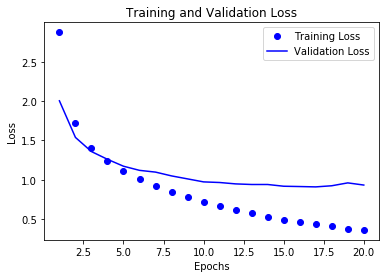

In [43]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label="Training Loss")
plt.plot(epochs,val_loss_values,'b',label="Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show



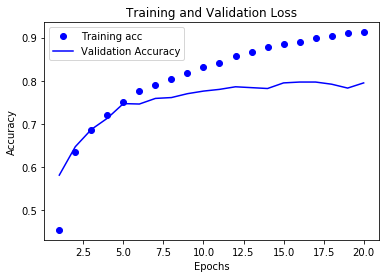

In [41]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label="Training acc")
plt.plot(epochs,val_acc_values,'b',label="Validation Accuracy")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [45]:
model.save("Reuter")

INFO:tensorflow:Assets written to: Reuter\assets


In [46]:
prediction=model.predict(x_test)

In [47]:
prediction

array([[1.07497417e-05, 7.53183940e-06, 2.93975631e-07, ...,
        6.04410661e-06, 4.88765352e-07, 1.24257326e-07],
       [5.40557194e-05, 3.22569598e-04, 1.65876688e-03, ...,
        1.58423546e-07, 1.67542987e-06, 3.91085314e-06],
       [5.93625737e-05, 9.88162339e-01, 2.07675286e-04, ...,
        2.91005085e-06, 3.76892713e-05, 3.62189166e-05],
       ...,
       [9.50779649e-05, 2.31522165e-04, 1.01169535e-04, ...,
        4.11271030e-05, 8.97241989e-05, 1.10154297e-05],
       [1.42799842e-03, 1.38364721e-03, 1.42155378e-03, ...,
        2.55449704e-04, 6.31066068e-05, 3.51606795e-05],
       [1.98060690e-04, 2.51824111e-01, 2.38882322e-02, ...,
        1.31479406e-04, 1.21681485e-02, 2.63209315e-03]], dtype=float32)

In [48]:
prediction.shape

(2246, 46)

In [49]:
prediction[0].sum()

1.0000002

In [51]:
prediction[0].argmax()

3